In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,cross_validate, KFold
from sklearn.base import BaseEstimator, TransformerMixin


from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import keras
from keras import layers


from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import string
from sklearn.preprocessing import LabelEncoder

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [2]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
exclude = set(string.punctuation)

In [3]:
path = 'Training_sheet.xlsx'
data = pd.read_excel(path, sheet_name='Training sheet')

In [4]:
data.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [5]:
convert_to_category= ['id','movie_sequel','Category','production_year']
for i in convert_to_category:
    print(i)
    data[i]= data[i].astype('category')

id
movie_sequel
Category
production_year


In [6]:
data['board_rating_reason_cleaned']= ''
for i in range(len(data)):
              
    comment= nlp(data.iloc[i]['board_rating_reason'].lower())
    comment = [word.text for word in comment]
    comment = [word for word in comment if word not in exclude]
    comment = [word for word in comment if word not in spacy_stopwords]
    comment = [word.lemma_ for word in nlp(" ".join(comment))]
   
    data.set_value(i, 'board_rating_reason_cleaned', comment) 

D:\Users\sayed\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


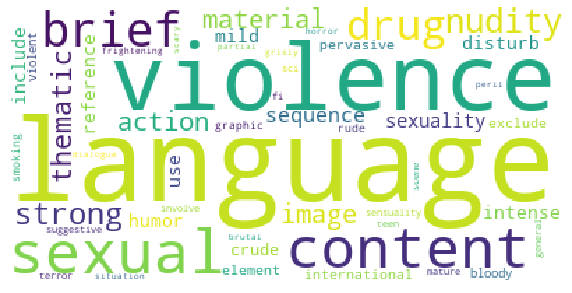

In [7]:
Comments = []

for i in range(len(data)):    
    
    comment= data.iloc[i]['board_rating_reason_cleaned']
    Comments +=  comment
    
    
Comments_string = " ".join(Comments) 

wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white",collocations = False).generate(Comments_string)
plt.figure(figsize=(10,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

In [8]:
print(Counter(Comments).most_common(20))


[('language', 772), ('violence', 464), ('sexual', 393), ('content', 364), ('brief', 238), ('drug', 218), ('nudity', 213), ('strong', 212), ('thematic', 172), ('action', 162), ('material', 155), ('image', 152), ('sequence', 148), ('sexuality', 142), ('include', 114), ('disturb', 108), ('use', 108), ('intense', 106), ('mild', 99), ('humor', 99)]


In [9]:
print(sorted(set(Comments)))


['  ', 'abuse', 'accident', 'action', 'admission', 'adventure', 'alcohol', 'animal', 'animate', 'appeal', 'art', 'assault', 'atrocity', 'attack', 'audience', 'battle', 'bawdy', 'behavior', 'bloody', 'bodily', 'bout', 'brief', 'brutal', 'brutality', 'bully', 'bullying', 'carnage', 'cartoon', 'caterpillar', 'child', 'choreography', 'climb', 'coarse', 'color', 'combat', 'comic', 'comment', 'content', 'creature', 'criminality', 'crude', 'cultural', 'dance', 'dancing', 'dangerous', 'depiction', 'dequence', 'description', 'destruction', 'dialogue', 'disaster', 'disturb', 'disturbing', 'domestic', 'drink', 'drinking', 'drug', 'drunkenness', 'edit', 'edition', 'element', 'emotional', 'epic', 'epithet', 'exclude', 'explicit', 'extend', 'extreme', 'extremely', 'fantasy', 'fi', 'fight', 'frank', 'frenetic', 'frequent', 'frighten', 'frightening', 'gangster', 'general', 'gesture', 'gore', 'gory', 'graphic', 'grisly', 'gruesome', 'hardship', 'historical', 'holocaust', 'horror', 'humor', 'illegal', '

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 16 columns):
id                                    1196 non-null category
name                                  1196 non-null object
display_name                          1196 non-null object
production_year                       1196 non-null category
movie_sequel                          1196 non-null category
creative_type                         1196 non-null object
source                                1196 non-null object
production_method                     1196 non-null object
genre                                 1196 non-null object
language                              1196 non-null object
board_rating_reason                   1196 non-null object
movie_board_rating_display_name       1196 non-null object
movie_release_pattern_display_name    1196 non-null object
total                                 1196 non-null int64
Category                              1196 non-null category
b

In [11]:
data['adult_content']= 0
data['violence']= 0
data['offensive_lang']= 0
data['drug']= 0

adult_content_values= ['sex', 'sexual', 'sexuality', 'sensual', 'sensuality', 'nude', 'nudity']
violence_values= ['violence', 'violent']
offensive_lang = 'language'
drug_values= 'drug'


for m in range(len(data)):
    reason= data.iloc[m]['board_rating_reason_cleaned']
    
    flag_adult_content= False
    flag_violence= False
    flag_offensive_lang= False
    flag_drug= False
    
    for n in reason:
        
        if flag_offensive_lang == False:
            if n == 'language':
                data.set_value(m, 'offensive_lang', 1) 
                flag_offensive_lang = True
                continue
                
        if flag_drug == False:
            if n  == 'drug':
                data.set_value(m, 'drug', 1) 
                flag_drug = True  
                continue
        
        if flag_violence == False:
            if n in violence_values:
                data.set_value(m, 'violence', 1) 
                flag_violence = True
                continue
                
        if flag_adult_content == False:
            if n in adult_content_values:
                data.set_value(m, 'adult_content', 1) 
                flag_adult_content = True
                continue 

D:\Users\sayed\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Users\sayed\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Users\sayed\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Users\sayed\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [12]:
data.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category,board_rating_reason_cleaned,adult_content,violence,offensive_lang,drug
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9,"[intense, epic, battle, sequence, warfare, sen...",1,0,1,0
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9,"[sequence, intense, action, violence, frighten...",0,1,0,0
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9,"[intense, prolonged, sequence, sci, fi, action...",1,1,1,0
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9,[general],0,0,0,0
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9,"[intense, sequence, action, adventure, violenc...",1,1,0,0


In [13]:
plot_list  = ['creative_type', 'source', 'production_method','genre', 'language', 'production_year', 'movie_sequel','movie_board_rating_display_name','movie_release_pattern_display_name','Category']


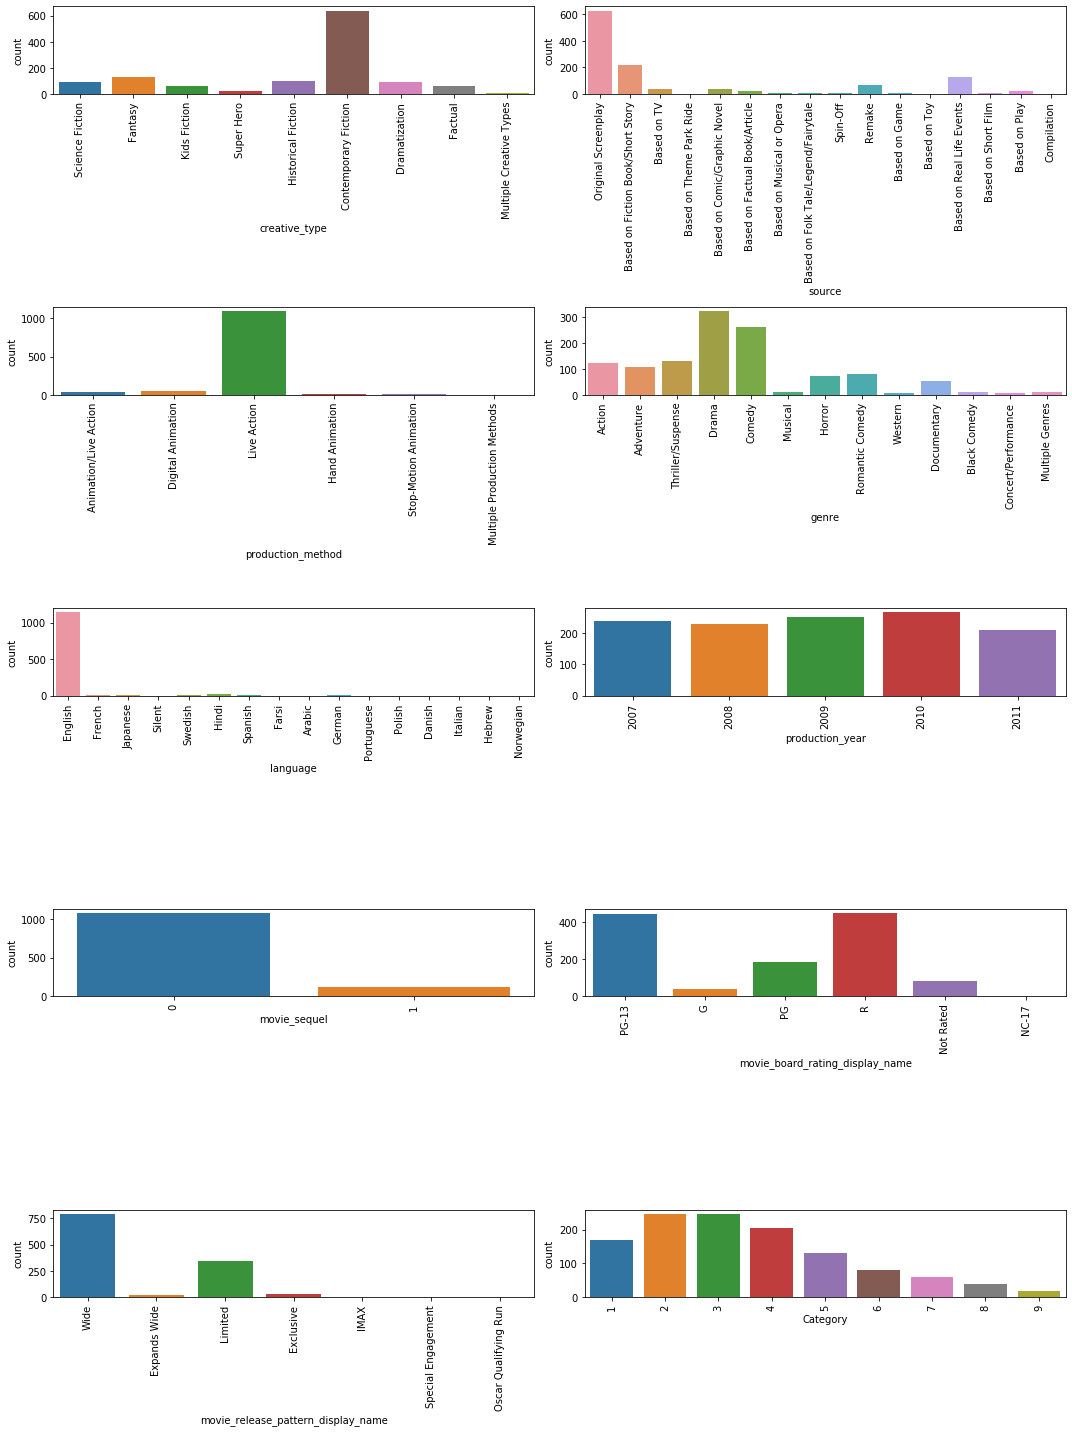

In [14]:
fig = plt.figure(figsize=(15,20))
for i,col in enumerate(plot_list):
    axis = plt.subplot(5, 2, i + 1)
    # Draw the plot
    axis = sns.countplot(data[col])
    plt.tight_layout()
    axis.set_xticklabels(labels = axis.get_xticklabels(),rotation=90)


In [15]:
plot_data = data.set_index('id')
remove_variables = ['name','display_name','board_rating_reason']
plot_data = data.drop(remove_variables,axis=1)

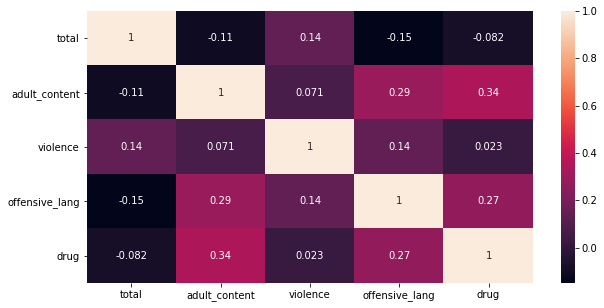

In [16]:
f = plt.figure(figsize=(10,5))
sns.heatmap(plot_data.corr(),annot = True)

In [17]:
class preprocessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.remove_variables = ['name','display_name','board_rating_reason','board_rating_reason_cleaned']
        self.dummy_cols = ['creative_type','source','production_method','genre','language','movie_board_rating_display_name','movie_release_pattern_display_name','production_year']
    
    def fit(self,data):
        return self
    
    def transform(self,data):
        data = data.set_index('id')
        data.drop(self.remove_variables,axis=1,inplace= True)
        dummies = data.loc[:,self.dummy_cols]
        dummies = pd.get_dummies(dummies)
        data.drop(self.dummy_cols,axis=1,inplace= True)
        data = data.join(dummies, how='left')
        return data
        
          


class feature_reduction(BaseEstimator, TransformerMixin):
    def __init__(self, comp):
        self.tsvd = TruncatedSVD(n_components=comp)
        self.comp = comp
        self.number= None
        
    
    def fit(self,X):
        X_tsvd = self.tsvd.fit(X)
        tsvd_var_ratios = self.tsvd.explained_variance_ratio_
        self.number = self.select_n_components(tsvd_var_ratios, 0.95)
        return self
    
    def transform(self,X):
        print(self.number)
        tsvd = TruncatedSVD(n_components=self.number)
        X_tsvd = tsvd.fit_transform(X)
        return X_tsvd
    
    def select_n_components(self,var_ratio, goal_var: float) -> int:
        total_variance = 0.0
        n_components = 0
        for explained_variance in var_ratio:
            total_variance += explained_variance
            n_components += 1

            if total_variance >= goal_var:
                break
        return n_components
    
class create_sparse(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X):
        return self
    
    def transform(self,X):
        return csr_matrix(X)
    
    
        

In [18]:
preprocessing = Pipeline([
    ('Prepare',preprocessing())
])

In [19]:
data= preprocessing.fit_transform(data)

In [20]:
data.head()

,movie_sequel,total,Category,adult_content,violence,offensive_lang,drug,creative_type_Contemporary Fiction,creative_type_Dramatization,creative_type_Factual,...,movie_release_pattern_display_name_IMAX,movie_release_pattern_display_name_Limited,movie_release_pattern_display_name_Oscar Qualifying Run,movie_release_pattern_display_name_Special Engagement,movie_release_pattern_display_name_Wide,production_year_2007,production_year_2008,production_year_2009,production_year_2010,production_year_2011
id,,,,,,,,,,,,,,,,,,,,,
7950115,0,2784,9,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
50950115,1,1328,9,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
119870115,1,1124,9,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
119590115,1,1064,9,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
91700115,1,1044,9,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
data.columns

Index(['movie_sequel', 'total', 'Category', 'adult_content', 'violence',
       'offensive_lang', 'drug', 'creative_type_Contemporary Fiction',
       'creative_type_Dramatization', 'creative_type_Factual',
       'creative_type_Fantasy', 'creative_type_Historical Fiction',
       'creative_type_Kids Fiction', 'creative_type_Multiple Creative Types',
       'creative_type_Science Fiction', 'creative_type_Super Hero',
       'source_Based on Comic/Graphic Novel',
       'source_Based on Factual Book/Article',
       'source_Based on Fiction Book/Short Story',
       'source_Based on Folk Tale/Legend/Fairytale', 'source_Based on Game',
       'source_Based on Musical or Opera', 'source_Based on Play',
       'source_Based on Real Life Events', 'source_Based on Short Film',
       'source_Based on TV', 'source_Based on Theme Park Ride',
       'source_Based on Toy', 'source_Compilation',
       'source_Original Screenplay', 'source_Remake', 'source_Spin-Off',
       'production_method_Ani

In [22]:
changes = data.filter(like='production_method').columns
change_df = data.loc[:,changes]

In [23]:
change_df.head()

,production_method_Animation/Live Action,production_method_Digital Animation,production_method_Hand Animation,production_method_Live Action,production_method_Multiple Production Methods,production_method_Stop-Motion Animation
id,,,,,,
7950115,1,0,0,0,0,0
50950115,1,0,0,0,0,0
119870115,1,0,0,0,0,0
119590115,0,1,0,0,0,0
91700115,0,0,0,1,0,0


In [24]:
data.filter(like='Animation').columns

Index(['production_method_Animation/Live Action',
       'production_method_Digital Animation',
       'production_method_Hand Animation',
       'production_method_Stop-Motion Animation'],
      dtype='object')

In [25]:
def animation(row):
    if row[data.filter(like='Animation').columns].any():
        return 1
    else:
        return 0
        

In [26]:
change_df['animation'] = change_df.apply(lambda x: animation(x), axis=1)

In [27]:
def live_action(row):
    if row['production_method_Animation/Live Action'] == 1:
        return 1
    else:
        return row['production_method_Live Action']

In [28]:
change_df['production_method_Live Action']= change_df.apply(lambda x : live_action(x),axis=1)
# row['production_method_Animation/Live Action']

In [29]:
change_df.head()

,production_method_Animation/Live Action,production_method_Digital Animation,production_method_Hand Animation,production_method_Live Action,production_method_Multiple Production Methods,production_method_Stop-Motion Animation,animation
id,,,,,,,
7950115,1,0,0,1,0,0,1
50950115,1,0,0,1,0,0,1
119870115,1,0,0,1,0,0,1
119590115,0,1,0,0,0,0,1
91700115,0,0,0,1,0,0,0


In [30]:
data['production_method_Live Action']  =change_df['production_method_Live Action']
data['animation'] = change_df['animation']

In [31]:
data.drop('production_method_Animation/Live Action',axis=1,inplace = True)

In [32]:
data.filter(like='genre')

,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Multiple Genres,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western
id,,,,,,,,,,,,,
7950115,1,0,0,0,0,0,0,0,0,0,0,0,0
50950115,0,1,0,0,0,0,0,0,0,0,0,0,0
119870115,1,0,0,0,0,0,0,0,0,0,0,0,0
119590115,0,1,0,0,0,0,0,0,0,0,0,0,0
91700115,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144410115,0,0,0,0,0,0,0,1,0,0,0,0,0
133000115,0,0,0,0,0,1,0,0,0,0,0,0,0
630115,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
data['genre_Comedy'] = np.where((data['genre_Black Comedy'] ==1) | (data['genre_Romantic Comedy']), 1, data['genre_Comedy'])

In [34]:
rename = list(data.columns)
rename = [i.lower() for i in rename]

In [35]:
rename = ['_'.join(i.split()) for i in rename]
data.columns = rename

In [36]:
data.columns

Index(['movie_sequel', 'total', 'category', 'adult_content', 'violence',
       'offensive_lang', 'drug', 'creative_type_contemporary_fiction',
       'creative_type_dramatization', 'creative_type_factual',
       'creative_type_fantasy', 'creative_type_historical_fiction',
       'creative_type_kids_fiction', 'creative_type_multiple_creative_types',
       'creative_type_science_fiction', 'creative_type_super_hero',
       'source_based_on_comic/graphic_novel',
       'source_based_on_factual_book/article',
       'source_based_on_fiction_book/short_story',
       'source_based_on_folk_tale/legend/fairytale', 'source_based_on_game',
       'source_based_on_musical_or_opera', 'source_based_on_play',
       'source_based_on_real_life_events', 'source_based_on_short_film',
       'source_based_on_tv', 'source_based_on_theme_park_ride',
       'source_based_on_toy', 'source_compilation',
       'source_original_screenplay', 'source_remake', 'source_spin-off',
       'production_method_dig

In [37]:
selector = SelectKBest(chi2, k=15).fit(data.drop(['total','category'],axis=1), data.loc[:,'category'])
scores = selector.scores_
cols = data.drop(['total','category'],axis=1).columns

In [38]:
data_d = {'cols':cols,'scores':scores}
feaures_imp = pd.DataFrame(data_d)
print(feaures_imp.nlargest(15,'scores'))

                                          cols      scores
73  movie_release_pattern_display_name_limited  254.976495
82                                   animation  220.989877
0                                 movie_sequel  193.114847
36                             genre_adventure  157.450040
76     movie_release_pattern_display_name_wide  131.044972
24             source_based_on_theme_park_ride  123.894737
30         production_method_digital_animation  116.832632
66   movie_board_rating_display_name_not_rated   95.939549
10                  creative_type_kids_fiction   82.086421
40                           genre_documentary   70.625017
21            source_based_on_real_life_events   58.686592
41                                 genre_drama   56.389674
7                        creative_type_factual   56.134314
13                    creative_type_super_hero   51.910082
8                        creative_type_fantasy   46.000925


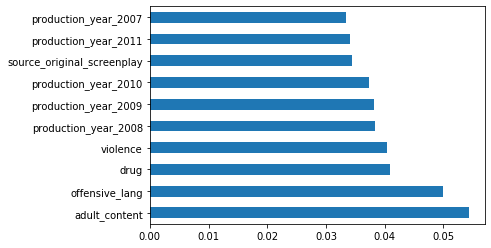

In [39]:
model = ExtraTreesClassifier(n_estimators=250)
model.fit(data.drop(['total','category'],axis=1),data.loc[:,'category'])
imp_feat = pd.Series(model.feature_importances_,index = data.drop(['total','category'],axis=1).columns)
imp_feat.nlargest(10).plot(kind='barh')

In [40]:
comp = data.drop(['category','total'],axis=1).shape[1]

In [41]:
pipeline = Pipeline([
    ('standardize',StandardScaler()),
    ('sparse',create_sparse()),
    ('apply tsvd', feature_reduction(comp-1)),
])

In [42]:
# Create a function
X_tsvd= pipeline.fit_transform(data.drop(['category','total'],axis=1))

62


In [43]:
y_class = data.loc[:,'category']
y_regress = data.loc[:,'total']

In [44]:
data.head()

,movie_sequel,total,category,adult_content,violence,offensive_lang,drug,creative_type_contemporary_fiction,creative_type_dramatization,creative_type_factual,...,movie_release_pattern_display_name_limited,movie_release_pattern_display_name_oscar_qualifying_run,movie_release_pattern_display_name_special_engagement,movie_release_pattern_display_name_wide,production_year_2007,production_year_2008,production_year_2009,production_year_2010,production_year_2011,animation
id,,,,,,,,,,,,,,,,,,,,,
7950115,0,2784,9,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
50950115,1,1328,9,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
119870115,1,1124,9,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
119590115,1,1064,9,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
91700115,1,1044,9,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
class_data = data.drop(['total','category'],axis=1)

In [46]:
X_tsvd= pipeline.fit_transform(class_data)

62


In [47]:
X_tsvd.shape

(1196, 62)

In [48]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_tsvd, y_class, test_size=0.20, random_state=42)

In [49]:
def evaluate_performance_class(model,X_train,X_test,y_train,y_test):
    
   
    labels = [1,2,3,4,5,6,7,8,9]
    print('Train: ')
    print()
    model.fit(X_train,y_train)
    pred = model.predict(X_train)
    
    cross_val = KFold(n_splits=10)
    scores = cross_validate(model, X_train, y_train, cv=cross_val,scoring = ['accuracy','recall_micro','roc_auc_ovo'])
    print('Mean Accuracy: %.3f' % np.mean(scores['test_accuracy']))
    print('Mean ROC AUC: %.3f' % np.mean(scores['test_roc_auc_ovo']))
    print('Mean Macro: %.3f' % np.mean(scores['test_recall_micro']))
    print(classification_report(y_train,pred))
    print(confusion_matrix(y_train,pred,labels=labels))
    
    
    print()
    print()
    print('Test: ' )
    print()
    pred = model.predict(X_test)
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred,labels=labels))
    
    
    

# Classification

In [162]:
models = [LogisticRegression(n_jobs=-1), SVC(probability=True),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for i in models:
    
    print(i.__class__.__name__)
    evaluate_performance_class(i,X_train,X_test,y_train,y_test)
    print()
    print('****************************************************************')

LogisticRegression
Train: 

Mean Accuracy: 0.272
Mean ROC AUC: 0.692
              precision    recall  f1-score   support

           1       0.50      0.61      0.55       142
           2       0.43      0.34      0.38       194
           3       0.32      0.39      0.35       192
           4       0.34      0.39      0.36       167
           5       0.36      0.41      0.38       100
           6       0.48      0.22      0.30        65
           7       0.45      0.21      0.29        48
           8       0.36      0.33      0.34        30
           9       0.70      0.78      0.74        18

    accuracy                           0.40       956
   macro avg       0.44      0.41      0.41       956
weighted avg       0.40      0.40      0.39       956

[[87 32 14  8  1  0  0  0  0]
 [50 65 46 26  3  2  1  1  0]
 [26 26 74 41 21  2  1  1  0]
 [ 6 17 50 65 22  3  0  3  1]
 [ 3  3 20 25 41  3  2  3  0]
 [ 1  3 17 15 11 14  1  3  0]
 [ 0  4  6  9  9  1 10  6  3]
 [ 0  0  1  2  6

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Accuracy: 0.252
Mean ROC AUC: 0.643
              precision    recall  f1-score   support

           1       0.52      0.70      0.60       142
           2       0.45      0.62      0.52       194
           3       0.44      0.44      0.44       192
           4       0.47      0.41      0.43       167
           5       0.46      0.34      0.39       100
           6       0.52      0.20      0.29        65
           7       0.47      0.31      0.38        48
           8       0.50      0.17      0.25        30
           9       0.57      0.67      0.62        18

    accuracy                           0.47       956
   macro avg       0.49      0.43      0.44       956
weighted avg       0.47      0.47      0.46       956

[[100  22  12   5   2   1   0   0   0]
 [ 40 120  16  11   5   1   0   1   0]
 [ 26  49  84  16   9   4   2   1   1]
 [ 14  31  39  68   8   4   3   0   0]
 [  5  17  22  17  34   1   3   1   0]
 [  3  16  10  12   6  13   5   0   0]
 [  3   7   6   7   

Mean Accuracy: 0.242
Mean ROC AUC: 0.670
              precision    recall  f1-score   support

           1       0.83      0.81      0.82       142
           2       0.77      0.85      0.81       194
           3       0.79      0.74      0.76       192
           4       0.83      0.78      0.81       167
           5       0.75      0.84      0.79       100
           6       0.85      0.78      0.82        65
           7       0.91      0.88      0.89        48
           8       0.94      0.97      0.95        30
           9       1.00      0.94      0.97        18

    accuracy                           0.81       956
   macro avg       0.85      0.84      0.85       956
weighted avg       0.81      0.81      0.81       956

[[115  14   6   5   1   1   0   0   0]
 [ 11 164  10   5   2   1   1   0   0]
 [  9  15 143  12   9   2   1   1   0]
 [  1   8  15 131   9   2   1   0   0]
 [  1   6   3   2  84   2   1   1   0]
 [  0   4   4   1   5  51   0   0   0]
 [  1   1   1   2   

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [200]:
models = [LogisticRegression(n_jobs=-1), SVC(probability=True),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for i in models:
    
    print(i.__class__.__name__)
    evaluate_performance_class(i,X_train,X_test,y_train,y_test)
    print()
    print('****************************************************************')

LogisticRegression
Train: 

[0.27083333 0.32291667 0.22916667 0.27083333 0.27083333 0.28125
 0.26315789 0.25263158 0.27368421 0.25263158]
Mean Accuracy: 0.269
Mean ROC AUC: 0.709
Mean Macro: 0.269
              precision    recall  f1-score   support

           1       0.50      0.62      0.56       142
           2       0.43      0.34      0.38       194
           3       0.33      0.38      0.35       192
           4       0.34      0.39      0.36       167
           5       0.35      0.41      0.38       100
           6       0.48      0.22      0.30        65
           7       0.43      0.19      0.26        48
           8       0.33      0.33      0.33        30
           9       0.68      0.72      0.70        18

    accuracy                           0.40       956
   macro avg       0.43      0.40      0.40       956
weighted avg       0.40      0.40      0.39       956

[[88 32 13  8  1  0  0  0  0]
 [50 65 45 26  4  2  1  1  0]
 [26 26 73 41 22  2  1  1  0]
 [ 7 17 

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.1875     0.22916667 0.21875    0.22916667 0.30208333 0.32291667
 0.29473684 0.22105263 0.16842105 0.27368421]
Mean Accuracy: 0.245
Mean ROC AUC: 0.627
Mean Macro: 0.245
              precision    recall  f1-score   support

           1       0.51      0.70      0.59       142
           2       0.47      0.59      0.53       194
           3       0.46      0.46      0.46       192
           4       0.46      0.43      0.44       167
           5       0.44      0.38      0.41       100
           6       0.50      0.20      0.29        65
           7       0.47      0.29      0.36        48
           8       0.50      0.13      0.21        30
           9       0.58      0.61      0.59        18

    accuracy                           0.47       956
   macro avg       0.49      0.42      0.43       956
weighted avg       0.47      0.47      0.46       956

[[ 99  17  17   6   1   1   1   0   0]
 [ 45 115  15  12   5   1   0   1   0]
 [ 23  43  88  18  12   4   2   1   1]
 [ 15 

[0.28125    0.1875     0.26041667 0.25       0.28125    0.27083333
 0.27368421 0.18947368 0.2        0.27368421]
Mean Accuracy: 0.247
Mean ROC AUC: 0.669
Mean Macro: 0.247
              precision    recall  f1-score   support

           1       0.82      0.82      0.82       142
           2       0.79      0.84      0.81       194
           3       0.78      0.74      0.76       192
           4       0.82      0.81      0.81       167
           5       0.77      0.80      0.78       100
           6       0.88      0.77      0.82        65
           7       0.91      0.88      0.89        48
           8       0.91      0.97      0.94        30
           9       0.95      1.00      0.97        18

    accuracy                           0.81       956
   macro avg       0.85      0.85      0.85       956
weighted avg       0.81      0.81      0.81       956

[[117  14   5   4   2   0   0   0   0]
 [ 10 162   9   6   4   2   1   0   0]
 [ 11  15 143  14   7   1   1   0   0]
 [  3 

In [192]:
#training = 64 , testing = 31 , cross_validation = 27

In [50]:
X, y = SMOTE().fit_resample(X_tsvd,y_class)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

In [51]:
Counter(y)

Counter({9: 247,
         8: 247,
         7: 247,
         6: 247,
         5: 247,
         4: 247,
         3: 247,
         2: 247,
         1: 247})

In [52]:
Counter(y_class)

Counter({9: 19, 8: 38, 7: 61, 6: 80, 5: 132, 4: 206, 3: 245, 2: 247, 1: 168})

In [53]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(Counter(y_train))


Counter({5: 198, 8: 198, 3: 198, 2: 198, 9: 198, 1: 197, 4: 197, 6: 197, 7: 197})


In [54]:
models = [LogisticRegression(n_jobs=-1), SVC(probability=True),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for i in models:
    
    print(i.__class__.__name__)
    evaluate_performance_class(i,X_train,X_test,y_train,y_test)
    print()
    print('****************************************************************')

LogisticRegression
Train: 

Mean Accuracy: 0.448
Mean ROC AUC: 0.825
Mean Macro: 0.448
              precision    recall  f1-score   support

           1       0.56      0.73      0.63       197
           2       0.34      0.24      0.28       198
           3       0.33      0.23      0.27       198
           4       0.40      0.39      0.39       197
           5       0.34      0.41      0.37       198
           6       0.51      0.52      0.52       197
           7       0.50      0.39      0.44       197
           8       0.66      0.79      0.72       198
           9       0.89      0.97      0.93       198

    accuracy                           0.52      1778
   macro avg       0.50      0.52      0.51      1778
weighted avg       0.50      0.52      0.51      1778

[[143  25  17   8   2   0   1   1   0]
 [ 63  48  23  28  15  14   3   4   0]
 [ 32  18  46  35  32  18   8   7   2]
 [ 14  17  17  77  30  19  13   9   1]
 [  5   7  11  27  82  21  20  25   0]
 [  0   7  15

Mean Accuracy: 0.621
Mean ROC AUC: 0.894
Mean Macro: 0.621
              precision    recall  f1-score   support

           1       0.91      0.97      0.94       197
           2       0.94      0.91      0.92       198
           3       0.96      0.90      0.93       198
           4       0.96      0.93      0.95       197
           5       0.95      0.96      0.95       198
           6       0.96      0.98      0.97       197
           7       0.99      1.00      0.99       197
           8       0.99      1.00      1.00       198
           9       1.00      1.00      1.00       198

    accuracy                           0.96      1778
   macro avg       0.96      0.96      0.96      1778
weighted avg       0.96      0.96      0.96      1778

[[192   4   0   0   1   0   0   0   0]
 [ 11 180   1   2   2   1   1   0   0]
 [  5   5 178   2   4   4   0   0   0]
 [  2   1   4 184   3   2   1   0   0]
 [  0   2   2   2 190   1   0   1   0]
 [  0   0   1   1   1 194   0   0   0]
 [

In [28]:
models = [LogisticRegression(n_jobs=-1), SVC(probability=True),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for i in models:
    
    print(i.__class__.__name__)
    evaluate_performance_class(i,X_train,X_test,y_train,y_test)
    print()
    print('****************************************************************')

LogisticRegression
Train: 

Mean Accuracy: 0.416
Mean ROC AUC: 0.820
Mean Macro: 0.416
              precision    recall  f1-score   support

           1       0.53      0.73      0.62       197
           2       0.41      0.26      0.32       198
           3       0.32      0.20      0.24       198
           4       0.32      0.32      0.32       197
           5       0.30      0.30      0.30       198
           6       0.44      0.58      0.50       197
           7       0.51      0.44      0.47       197
           8       0.62      0.73      0.67       198
           9       0.91      0.97      0.94       198

    accuracy                           0.50      1778
   macro avg       0.49      0.50      0.49      1778
weighted avg       0.49      0.50      0.49      1778

[[143  24  16  10   0   3   1   0   0]
 [ 65  51  19  26  11  21   4   1   0]
 [ 35  12  39  33  25  33  10  10   1]
 [ 16  11  24  63  32  26  17   8   0]
 [  7  11  11  37  59  40  16  17   0]
 [  0   8   7

Mean Accuracy: 0.594
Mean ROC AUC: 0.873
Mean Macro: 0.594
              precision    recall  f1-score   support

           1       0.83      0.88      0.86       197
           2       0.79      0.79      0.79       198
           3       0.83      0.77      0.80       198
           4       0.84      0.82      0.83       197
           5       0.86      0.91      0.88       198
           6       0.98      0.93      0.96       197
           7       0.97      0.97      0.97       197
           8       0.99      1.00      0.99       198
           9       0.99      1.00      1.00       198

    accuracy                           0.90      1778
   macro avg       0.90      0.90      0.90      1778
weighted avg       0.90      0.90      0.90      1778

[[174  13   5   4   1   0   0   0   0]
 [ 20 156   6   5  10   1   0   0   0]
 [  8  13 153  14   6   0   3   1   0]
 [  4   8  10 162  10   1   2   0   0]
 [  2   3   6   2 180   1   1   2   1]
 [  0   3   3   4   3 184   0   0   0]
 [

# Grid Search XgBoost

In [ ]:
n_iter=20
model2 = XGBClassifier(
    tree_method = "gpu_hist"
)
# Create the grid search parameter grid and scoring funcitons
param_grid = {
    "learning_rate": [0.1, 0.01],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2, 3, 4],
    "n_estimators": [200, 300, 400, 500],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3]
}


# create the grid search object
grid1 = RandomizedSearchCV(estimator=model2, param_distributions=param_grid, scoring='accuracy', n_iter=n_iter)
best_model = grid1.fit(X_train,y_train)

In [109]:
model = best_model.best_estimator_

In [110]:
best_model.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'n_estimators': 400,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [111]:
# model = XGBClassifier(tree_method='gpu_hist', subsample = 0.8, reg_lambda = 1.5, n_estimators =400, max_depth=3, learning_rate=0.1, gamma=0, colsample_bytree=0.6 )

In [112]:
evaluate_performance_class(model,X_train,X_test,y_train,y_test)

Train: 

Mean Accuracy: 0.628
Mean ROC AUC: 0.897
Mean Macro: 0.628
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       197
           2       0.92      0.93      0.92       198
           3       0.94      0.92      0.93       198
           4       0.96      0.92      0.94       197
           5       0.94      0.97      0.96       198
           6       0.96      0.98      0.97       197
           7       0.99      0.99      0.99       197
           8       0.99      1.00      1.00       198
           9       1.00      1.00      1.00       198

    accuracy                           0.96      1778
   macro avg       0.96      0.96      0.96      1778
weighted avg       0.96      0.96      0.96      1778

[[186   7   2   2   0   0   0   0   0]
 [  7 184   2   1   2   1   1   0   0]
 [  3   4 182   2   4   3   0   0   0]
 [  0   3   5 182   5   2   0   0   0]
 [  1   2   1   0 192   1   0   1   0]
 [  0   0   2   1   1 193   0   

In [125]:
parameters = {'n_estimators': [200,150,300,400], 'max_depth':[2,4,6,8,9,11],'min_samples_leaf':[1,2,3,4,5], 'min_samples_split':[4,8,2,6,10], 'max_samples' : [0.25,0.2,0.6,0.8]}
model= RandomForestClassifier(n_jobs=-1, random_state=42)
classifier_model = GridSearchCV(model, parameters)

In [126]:
classifier_model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                 

In [127]:
classifier_model.best_params_

{'max_depth': 11,
 'max_samples': 0.6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [131]:
classifier_model.best_params_

{'max_depth': 11,
 'max_samples': 0.6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [128]:
model = classifier_model.best_estimator_

In [132]:
evaluate_performance_class(model,X_train,X_test,y_train,y_test)

Train: 

Mean Accuracy: 0.611
Mean ROC AUC: 0.899
Mean Macro: 0.611
              precision    recall  f1-score   support

           1       0.92      0.94      0.93       197
           2       0.94      0.89      0.92       198
           3       0.96      0.87      0.91       198
           4       0.91      0.94      0.93       197
           5       0.91      0.97      0.94       198
           6       0.97      0.97      0.97       197
           7       0.99      0.99      0.99       197
           8       0.99      1.00      0.99       198
           9       1.00      1.00      1.00       198

    accuracy                           0.95      1778
   macro avg       0.95      0.95      0.95      1778
weighted avg       0.95      0.95      0.95      1778

[[185   4   1   5   2   0   0   0   0]
 [ 11 177   1   3   3   2   1   0   0]
 [  4   5 173   5   7   2   1   1   0]
 [  1   1   3 186   4   2   0   0   0]
 [  0   1   1   2 193   0   0   1   0]
 [  0   0   2   1   3 191   0   

In [116]:
classifier_model.best_params_

{'max_depth': 12, 'min_samples_leaf': 1, 'n_estimators': 200}

In [117]:
model = classifier_model.best_estimator_

In [118]:
evaluate_performance_class(model,X_train,X_test,y_train,y_test)

Train: 

Mean Accuracy: 0.614
Mean ROC AUC: 0.901
Mean Macro: 0.614
              precision    recall  f1-score   support

           1       0.94      0.96      0.95       197
           2       0.94      0.91      0.92       198
           3       0.94      0.91      0.93       198
           4       0.95      0.94      0.94       197
           5       0.94      0.96      0.95       198
           6       0.96      0.97      0.97       197
           7       0.99      0.99      0.99       197
           8       0.99      1.00      1.00       198
           9       1.00      1.00      1.00       198

    accuracy                           0.96      1778
   macro avg       0.96      0.96      0.96      1778
weighted avg       0.96      0.96      0.96      1778

[[189   4   2   2   0   0   0   0   0]
 [ 10 180   2   1   3   1   1   0   0]
 [  3   4 181   3   4   3   0   0   0]
 [  0   3   4 185   3   2   0   0   0]
 [  0   1   2   2 191   1   0   1   0]
 [  0   0   2   1   2 192   0   

In [55]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import tensorflow as tf
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

In [56]:
label_index = {0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9}

In [57]:
X_train.shape

(1778, 62)

In [58]:
y_keras_train = pd.get_dummies(y_train)
y_keras_test = pd.get_dummies(y_test)

In [59]:
y_keras_train.shape

(1778, 9)

In [81]:
# Start neural network
network = models.Sequential()


# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(250, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(130, activation='relu'))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dropout(0.5))
network.add(layers.Dense(80, activation='relu'))
network.add(layers.Dense(20, activation='relu'))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(9, activation='softmax'))

In [82]:
network.compile(loss='categorical_crossentropy', # Cross-entropy
                optimizer='ADAM', # Root Mean Square Propagation
                metrics=['accuracy'])

In [83]:
# Train neural network
early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
history = network.fit(X_train, # Features
                      y_keras_train, # Target vector
                      epochs=500, # Number of epochs
                      verbose=2, # Print description after each epoch
                      batch_size=200, # Number of observations per batch
                      validation_data=(X_test, y_keras_test),
                       callbacks=[early_stop]) # Data for evaluation

Train on 1778 samples, validate on 445 samples
Epoch 1/500
 - 0s - loss: 2.2744 - accuracy: 0.1237 - val_loss: 2.1545 - val_accuracy: 0.2112
Epoch 2/500
 - 0s - loss: 2.1749 - accuracy: 0.1766 - val_loss: 2.1163 - val_accuracy: 0.2472
Epoch 3/500
 - 0s - loss: 2.1084 - accuracy: 0.2109 - val_loss: 2.0605 - val_accuracy: 0.2899
Epoch 4/500
 - 0s - loss: 2.0289 - accuracy: 0.2632 - val_loss: 1.9912 - val_accuracy: 0.3236
Epoch 5/500
 - 0s - loss: 1.9759 - accuracy: 0.2812 - val_loss: 1.9224 - val_accuracy: 0.3213
Epoch 6/500
 - 0s - loss: 1.9127 - accuracy: 0.2863 - val_loss: 1.8573 - val_accuracy: 0.3371
Epoch 7/500
 - 0s - loss: 1.8518 - accuracy: 0.3076 - val_loss: 1.7962 - val_accuracy: 0.3461
Epoch 8/500
 - 0s - loss: 1.8046 - accuracy: 0.3532 - val_loss: 1.7286 - val_accuracy: 0.3640
Epoch 9/500
 - 0s - loss: 1.7440 - accuracy: 0.3633 - val_loss: 1.6748 - val_accuracy: 0.3685
Epoch 10/500
 - 0s - loss: 1.6969 - accuracy: 0.3594 - val_loss: 1.6357 - val_accuracy: 0.3888
Epoch 11/500

Epoch 87/500
 - 0s - loss: 0.8952 - accuracy: 0.6406 - val_loss: 1.1487 - val_accuracy: 0.6180
Epoch 88/500
 - 0s - loss: 0.8740 - accuracy: 0.6665 - val_loss: 1.1393 - val_accuracy: 0.6045
Epoch 89/500
 - 0s - loss: 0.8411 - accuracy: 0.6721 - val_loss: 1.1315 - val_accuracy: 0.6157
Epoch 90/500
 - 0s - loss: 0.8684 - accuracy: 0.6665 - val_loss: 1.1466 - val_accuracy: 0.6090
Epoch 91/500
 - 0s - loss: 0.8585 - accuracy: 0.6625 - val_loss: 1.1313 - val_accuracy: 0.6022
Epoch 92/500
 - 0s - loss: 0.8513 - accuracy: 0.6789 - val_loss: 1.1250 - val_accuracy: 0.6157
Epoch 93/500
 - 0s - loss: 0.8287 - accuracy: 0.6873 - val_loss: 1.1223 - val_accuracy: 0.6067
Epoch 94/500
 - 0s - loss: 0.8473 - accuracy: 0.6710 - val_loss: 1.1415 - val_accuracy: 0.6090
Epoch 95/500
 - 0s - loss: 0.8501 - accuracy: 0.6777 - val_loss: 1.1401 - val_accuracy: 0.6090
Epoch 96/500
 - 0s - loss: 0.8435 - accuracy: 0.6766 - val_loss: 1.1322 - val_accuracy: 0.6090
Epoch 97/500
 - 0s - loss: 0.8530 - accuracy: 0.66

In [84]:
predictions = network.predict_classes(X_test)

In [85]:
prediction = [label_index[i] for i in predictions]

In [86]:
accuracy_score(y_test,prediction)

0.6022471910112359

In [87]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.61      0.66      0.63        50
           2       0.17      0.10      0.13        49
           3       0.18      0.14      0.16        49
           4       0.37      0.34      0.35        50
           5       0.53      0.63      0.58        49
           6       0.58      0.70      0.64        50
           7       0.79      0.88      0.83        50
           8       0.90      0.96      0.93        49
           9       0.94      1.00      0.97        49

    accuracy                           0.60       445
   macro avg       0.57      0.60      0.58       445
weighted avg       0.57      0.60      0.58       445



In [67]:
print(confusion_matrix(y_test,prediction))

[[35  4  8  1  1  1  0  0  0]
 [14  2 14  7  1  7  3  0  1]
 [ 5  3  5 19  3 13  1  0  0]
 [ 6  0  3 20  0 17  4  0  0]
 [ 2  0  2 11  8 18  6  2  0]
 [ 0  0  5  7  0 37  0  1  0]
 [ 0  1  0  0  2 15 17 15  0]
 [ 0  0  0  0  0  4  6 37  2]
 [ 0  0  0  0  0  0  0  0 49]]


In [91]:
network.save("keras.h5")

In [50]:
from keras.models import load_model
network = load_model('keras.h5')

In [ ]:
from sklearn.ensemble import VotingClassifier

In [55]:
import pickle

In [131]:
def Voting(prob1,prob2,prob3):
    label_index = {0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9}
    voting = prob1+prob2+prob3
    vote = []
    for i in range(voting.shape[0]):
        vote.append(label_index[np.argmax(voting[i])])
    return vote
    
    

In [57]:
rnd_forst = RandomForestClassifier()
xgb = XGBClassifier(subsample= 0.8,
 reg_lambda= 1,
 n_estimators= 400,
 max_depth= 3,
 learning_rate= 0.1,
 gamma= 0,
 colsample_bytree= 0.8)

In [58]:
rnd_forst.fit(X_train,y_train)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [62]:
filename = 'random_forest.sav'
pickle.dump(rnd_forst, open(filename, 'wb'))

In [63]:
filename = 'xgboost.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [62]:
prob2 = xgb.predict_proba(X_test)

In [63]:
prob2.shape

(445, 9)

In [67]:
prob3 = network.predict(X_test)

In [132]:
prediction_class = Voting(prob1,prob2,prob3)

In [104]:
(prob1[1]+prob2[1]+prob3[2]).sum()

2.9999998983112164

In [133]:
classes= rnd_forst.classes_


prob1_classes = [classes[np.argmax(i)] for i in prob1] 
prob2_classes = [classes[np.argmax(i)] for i in prob2] 
prob3_classes = [classes[np.argmax(i)] for i in prob3] 

data = {'Random Forest': prob1_classes, 'XGBoost': prob2_classes, 'Deep Learning': prob3_classes, 'Ensemble': prediction_class}

result = pd.DataFrame(data)

In [134]:
rnd_forst.classes_

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [64]:
result.head(20)

NameError: name 'result' is not defined

In [136]:
print(classification_report(y_test,prob1_classes))

              precision    recall  f1-score   support

           1       0.66      0.62      0.64        50
           2       0.17      0.16      0.17        49
           3       0.28      0.24      0.26        49
           4       0.45      0.42      0.43        50
           5       0.60      0.63      0.61        49
           6       0.68      0.64      0.66        50
           7       0.73      0.82      0.77        50
           8       0.85      0.96      0.90        49
           9       0.94      1.00      0.97        49

    accuracy                           0.61       445
   macro avg       0.60      0.61      0.60       445
weighted avg       0.60      0.61      0.60       445



In [137]:
print(classification_report(y_test,prob2_classes))

              precision    recall  f1-score   support

           1       0.69      0.62      0.65        50
           2       0.21      0.20      0.21        49
           3       0.28      0.27      0.27        49
           4       0.51      0.46      0.48        50
           5       0.52      0.59      0.55        49
           6       0.68      0.64      0.66        50
           7       0.76      0.84      0.80        50
           8       0.90      0.96      0.93        49
           9       0.94      1.00      0.97        49

    accuracy                           0.62       445
   macro avg       0.61      0.62      0.61       445
weighted avg       0.61      0.62      0.61       445



In [138]:
print(classification_report(y_test,prob3_classes))

              precision    recall  f1-score   support

           1       0.66      0.76      0.70        50
           2       0.25      0.20      0.22        49
           3       0.26      0.16      0.20        49
           4       0.49      0.46      0.47        50
           5       0.67      0.63      0.65        49
           6       0.70      0.78      0.74        50
           7       0.82      0.98      0.89        50
           8       0.82      0.96      0.89        49
           9       0.98      1.00      0.99        49

    accuracy                           0.66       445
   macro avg       0.63      0.66      0.64       445
weighted avg       0.63      0.66      0.64       445



In [139]:
print(classification_report(y_test,prediction_class))

              precision    recall  f1-score   support

           1       0.63      0.64      0.63        50
           2       0.19      0.16      0.17        49
           3       0.28      0.22      0.25        49
           4       0.50      0.46      0.48        50
           5       0.63      0.65      0.64        49
           6       0.71      0.72      0.71        50
           7       0.81      0.92      0.86        50
           8       0.87      0.96      0.91        49
           9       0.94      1.00      0.97        49

    accuracy                           0.64       445
   macro avg       0.62      0.64      0.63       445
weighted avg       0.62      0.64      0.63       445



In [140]:
#Scoring Sheet.xlsx


In [51]:
path = 'Scoring Sheet.xlsx'
scorng_data = pd.read_excel(path, sheet_name='scoring-2012-challenge (1)')

In [53]:
scorng_data = scorng_data.drop('production_budget',axis=1)

In [54]:
# Converting 'id','movie_sequel','Category','production_year' from integer to categorical datatype

convert_to_category= ['id','movie_sequel','production_year']
for i in convert_to_category:
    scorng_data[i]= scorng_data[i].astype('category')

In [56]:
# Creating a new column 'board_rating_reason_cleaned' 
scorng_data['board_rating_reason_cleaned']= ''

# Using NLP to pre-process the text data of 'board_rating_reason' and storing key words in 'board_rating_reason_cleaned'

for i in range(len(scorng_data)):
              
    comment= nlp(scorng_data.iloc[i]['board_rating_reason'].lower())            # lowercase the text data 
    comment = [word.text for word in comment]                            # tokenise sentence
    comment = [word for word in comment if word not in exclude]          # remove punctuations
    comment = [word for word in comment if word not in spacy_stopwords]  # remove stopwords
    comment = [word.lemma_ for word in nlp(" ".join(comment))]           # words lemmalization
   
    scorng_data.at[i,'board_rating_reason_cleaned'] =comment      

In [57]:
scorng_data.board_rating_reason_cleaned

0     [intense, sequence, sci, fi, violence, action,...
1     [intense, sequence, violence, action, sensuali...
2     [intense, violent, sequence, sexuality, langua...
3     [sequence, violence, include, disturb, image, ...
4     [extend, sequence, intense, fantasy, action, v...
                            ...                        
86    [mature, thematic, material, violence, sexuali...
87    [sequence, action, violence, thematic, element...
88       [strong, sexual, content, language, drug, use]
89        [scene, violence, brief, language, drug, use]
90                             [international, exclude]
Name: board_rating_reason_cleaned, Length: 91, dtype: object

In [52]:
random = RandomForestClassifier(max_depth= 11,
 max_samples =  0.6,
 min_samples_leaf = 1,
 min_samples_split =  2,
 n_estimators = 150)

In [53]:
random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
filename = 'rand2.sav'
pickle.dump(random, open(filename, 'wb'))